In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from sklearn.cluster import KMeans

# Point Color

(2100, 2)


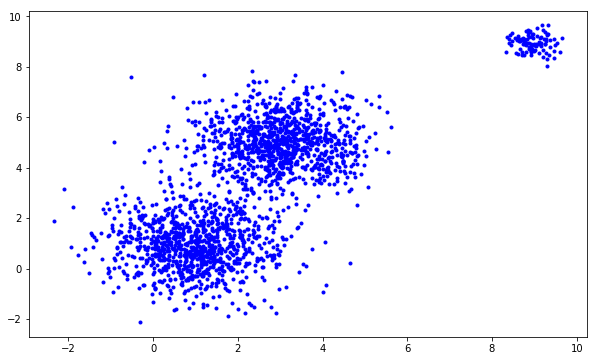

In [3]:
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 1000)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 1000)
G2 = np.random.multivariate_normal([9, 9], np.eye(2)/10, 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

In [4]:
k = 3
kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

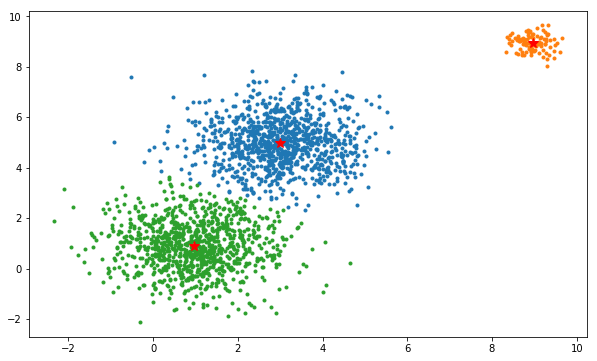

In [5]:
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(X[kmeans.labels_ == i, 0],
             X[kmeans.labels_ == i, 1], '.')
    plt.plot(kmeans.cluster_centers_[i, 0],
             kmeans.cluster_centers_[i, 1], '*', markersize=10, c='r')
plt.show()

# Dominant Color

In [ ]:
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 1000)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 1000)
G2 = np.random.multivariate_normal([9, 9], np.eye(2)/10, 1000)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

In [ ]:
k = 2
kmeans = KMeans(n_clusters = k, random_state = 0)
kmeans.fit(X)

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(X[kmeans.labels_ == i, 0],
             X[kmeans.labels_ == i, 1], '.')
    plt.plot(kmeans.cluster_centers_[i, 0],
             kmeans.cluster_centers_[i, 1], '*', markersize=10, c='r')
plt.show()

# Finding Point Color

In [ ]:
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 1000)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 1000)
G2 = np.random.multivariate_normal([9, 9], np.eye(2)/10, 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

In [ ]:
k = 2
mu = np.array([[0, 0]
              ,[5, 5]])
mu = mu.astype(int)
c = np.empty(k, dtype=object)
n_iter = 10

In [ ]:
dist = np.empty([X.shape[0], k])

In [ ]:
print(mu.shape)
print(dist.shape)
print(X.shape)

# k-means

(2100, 2)


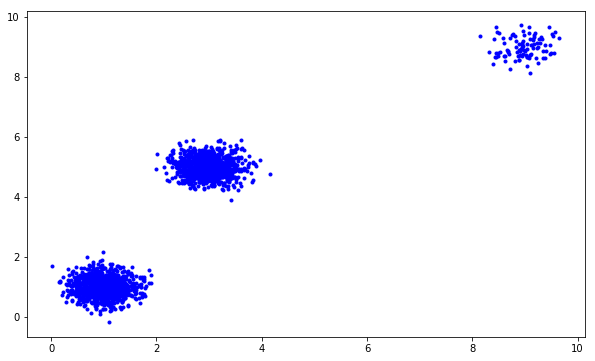

In [47]:
G0 = np.random.multivariate_normal([1, 1], np.eye(2)/10, 1000)
G1 = np.random.multivariate_normal([3, 5], np.eye(2)/10, 1000)
G2 = np.random.multivariate_normal([9, 9], np.eye(2)/10, 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[:,0], X[:,1], 'b.')
plt.show()

In [52]:
def k_means(X, k, n_iter = 10, verbose=False):
    mu = np.array([np.linspace(0.1, 1, k),
                   np.linspace(0.1, 1, k)]).T
    prev_mu = mu.copy()
    c = np.empty(k, dtype=object)
    A = X.copy()
    dist = np.empty([X.shape[0], k])
    
    # plot initiate point
    for i in range(k):
        dist[:,i] = np.linalg.norm(A-mu[i], 2, axis=1)
        
    min_idx_matrix = np.argmin(dist, axis=1)
    for i in range(k):
        c[i] = np.where(min_idx_matrix == i)[0]
    if verbose:
        print(mu)
        plt.figure(figsize=(10, 6))
        for i in range(k):
            plt.plot(X[c[i], 0],
                     X[c[i], 1], '.')
            plt.plot(mu[i, 0],
                     mu[i, 1], '*', markersize=10, c='r')
        plt.show()
    
    # k-means
    for iteration in range(n_iter):
        for i in range(k):
            dist[:,i] = np.linalg.norm(A-mu[i], 2, axis=1)

        min_idx_matrix = np.argmin(dist, axis=1)
        for i in range(k):
            c[i] = np.where(min_idx_matrix == i)[0]
            mu[i] = np.mean(A[c[i]], axis=0)

        if verbose:
            print("iter : {}\nAvg of dist : {}".format(iteration, np.mean(dist)))
            plt.figure(figsize=(10, 6))
            for i in range(k):
                print("mu[{}] : {}".format(i, mu[i]))
                plt.plot(X[c[i], 0],
                         X[c[i], 1], '.')
                plt.plot(prev_mu[i, 0],
                         prev_mu[i, 1], '*', markersize=10, c='y')
                plt.plot(mu[i, 0],
                         mu[i, 1], '*', markersize=10, c='r')
            plt.show()
            prev_mu = mu.copy()
            
    if not verbose:
        plt.figure(figsize=(10, 6))
        for i in range(k):
            print("mu[{}] : {}".format(i, mu[i]))
            plt.plot(X[c[i], 0],
                     X[c[i], 1], '.')
            plt.plot(mu[i, 0],
                     mu[i, 1], '*', markersize=10, c='r')
        plt.show()
    
    return mu, c

[[0.1 0.1]
 [1.  1. ]]


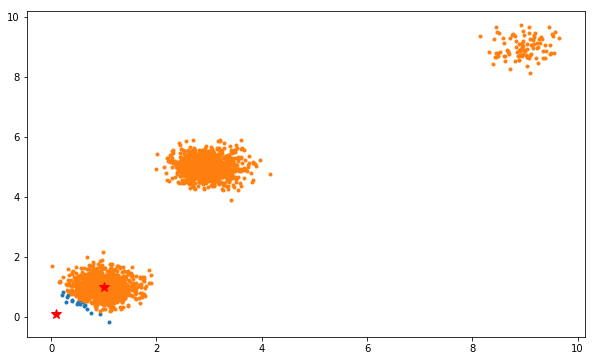

iter : 0
Avg of dist : 3.391660340617635
mu[0] : [0.53183798 0.43655883]
mu[1] : [2.33462411 3.30605246]


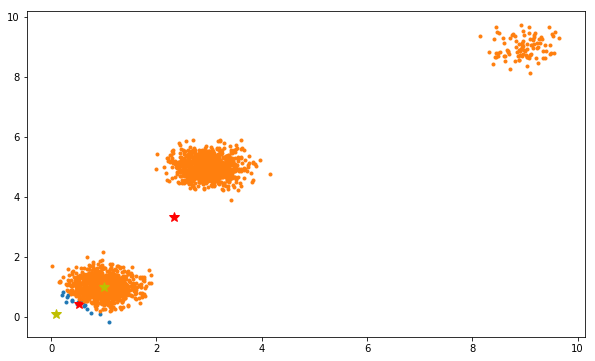

iter : 1
Avg of dist : 2.9979654481534634
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


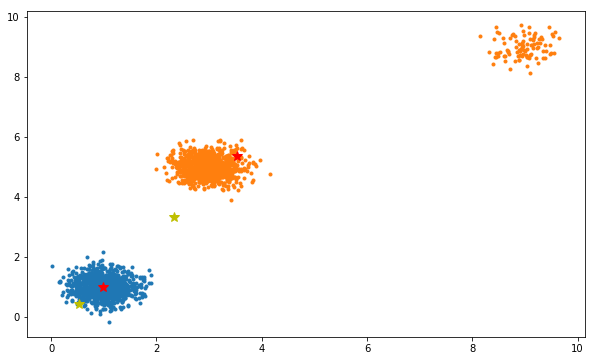

iter : 2
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


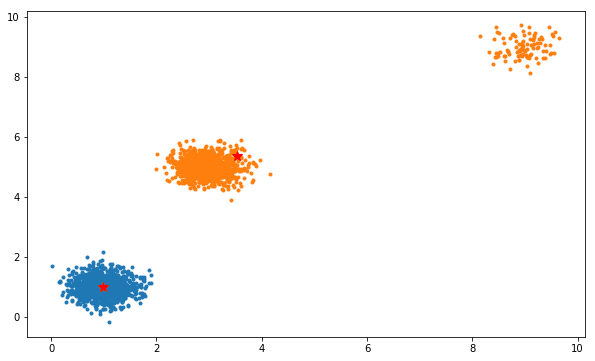

iter : 3
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


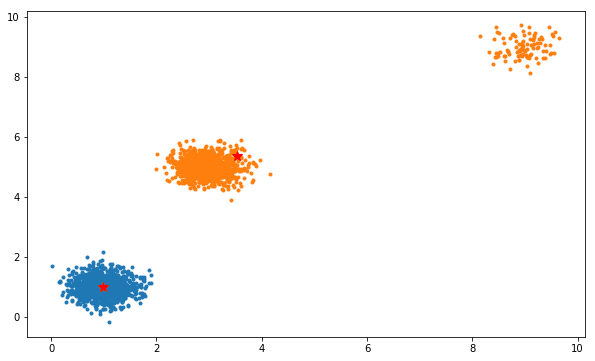

iter : 4
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


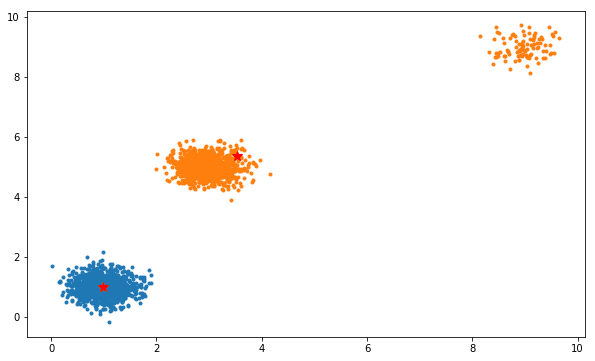

iter : 5
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


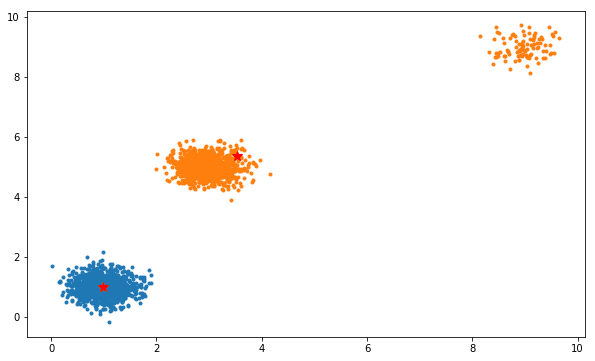

iter : 6
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


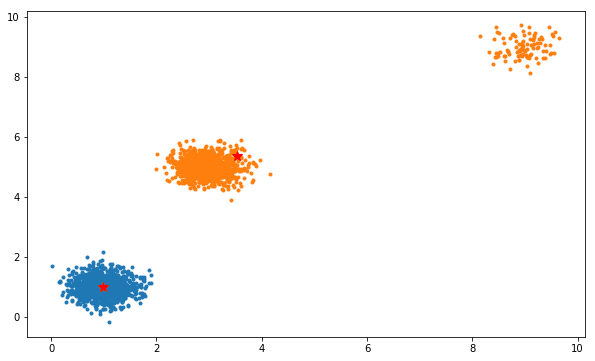

iter : 7
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


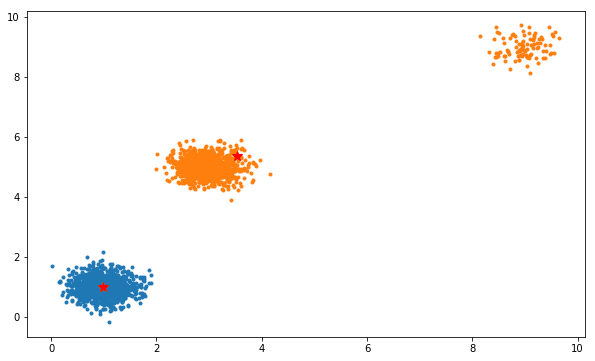

iter : 8
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


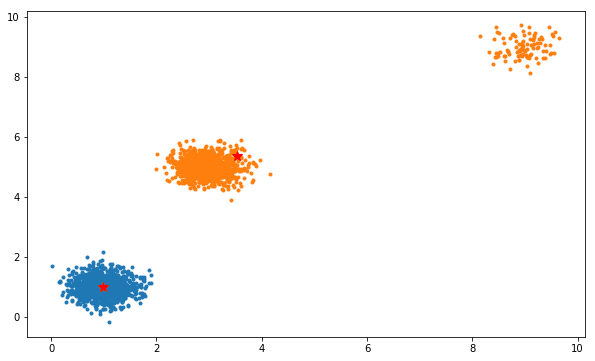

iter : 9
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


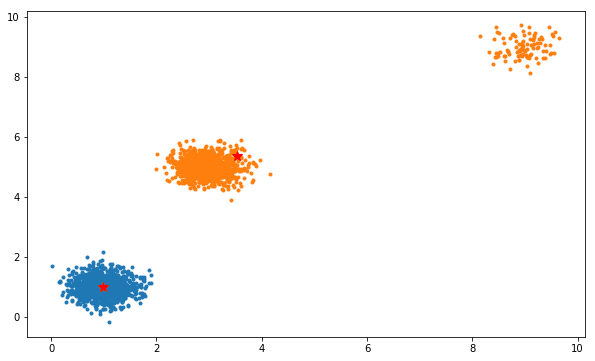

iter : 10
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


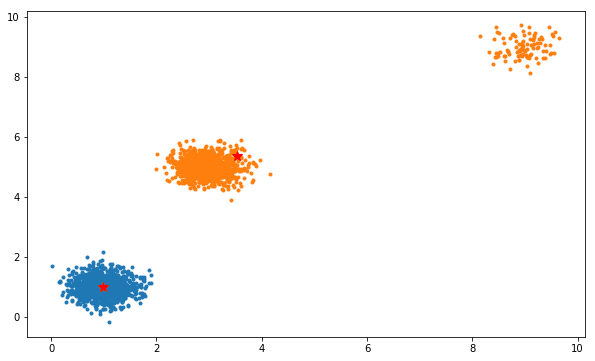

iter : 11
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


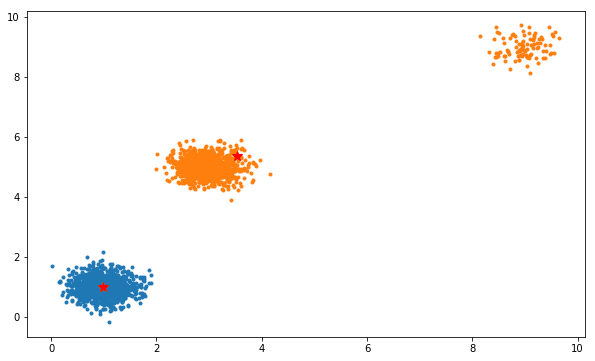

iter : 12
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


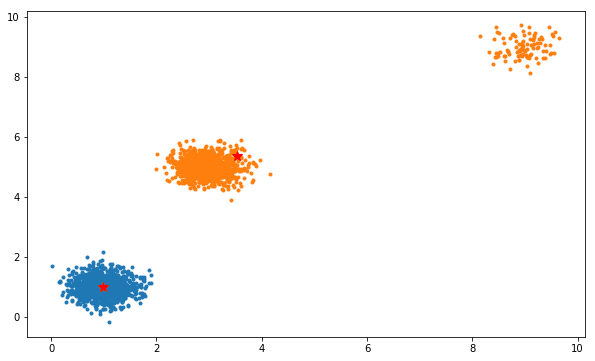

iter : 13
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


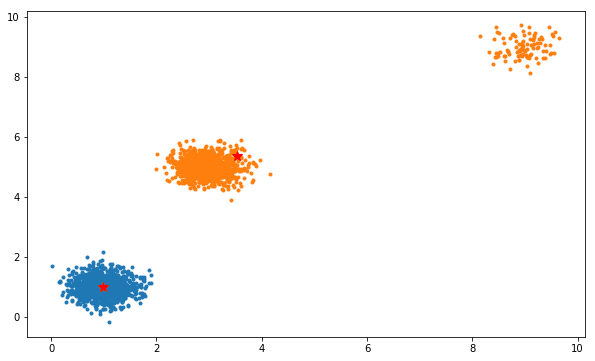

iter : 14
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


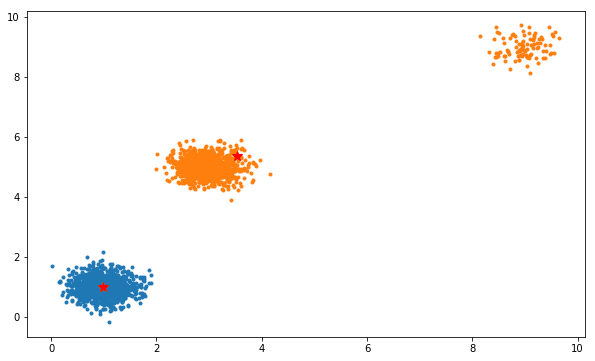

iter : 15
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


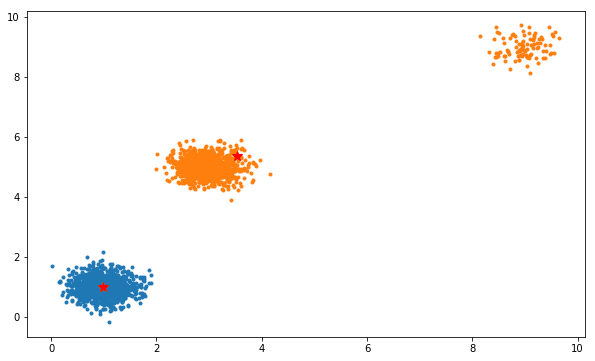

iter : 16
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


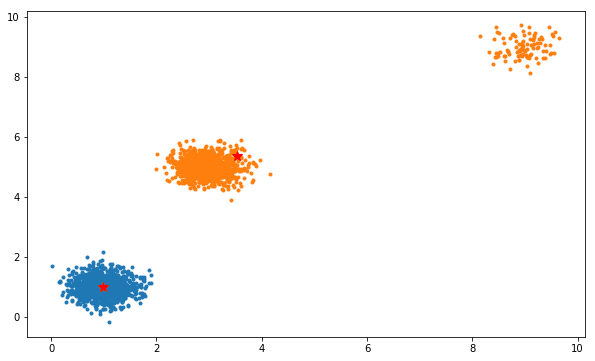

iter : 17
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


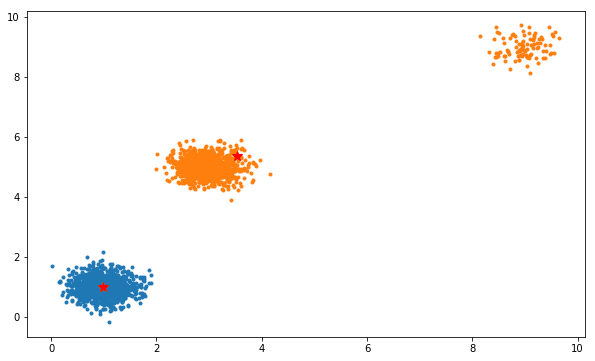

iter : 18
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


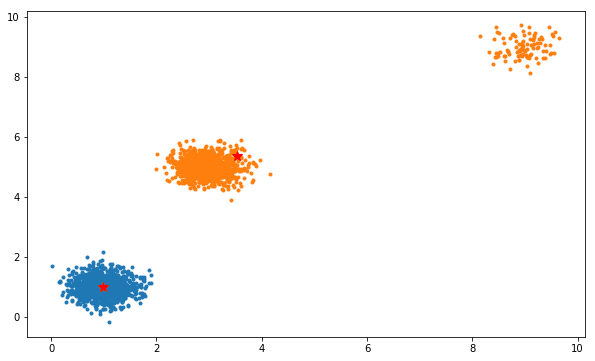

iter : 19
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


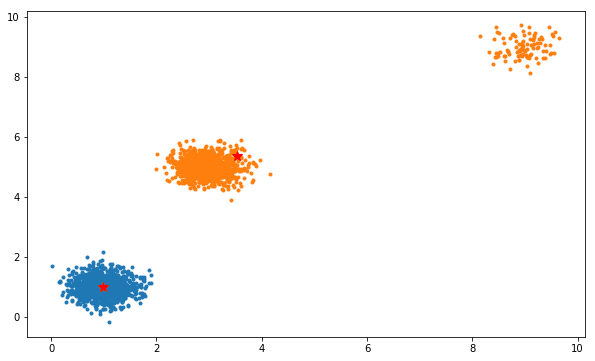

iter : 20
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


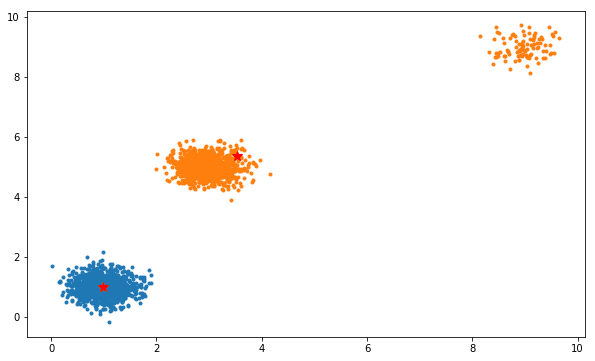

iter : 21
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


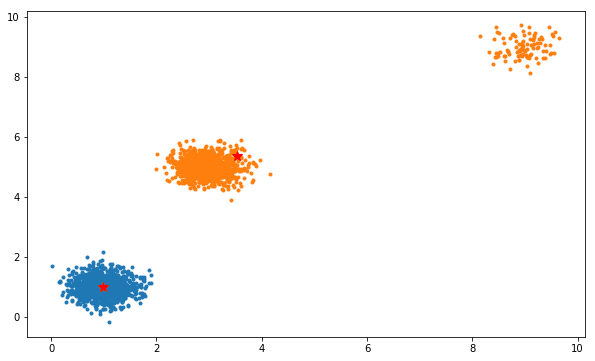

iter : 22
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


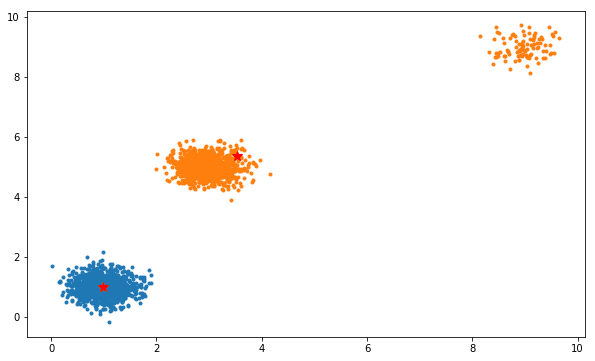

iter : 23
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


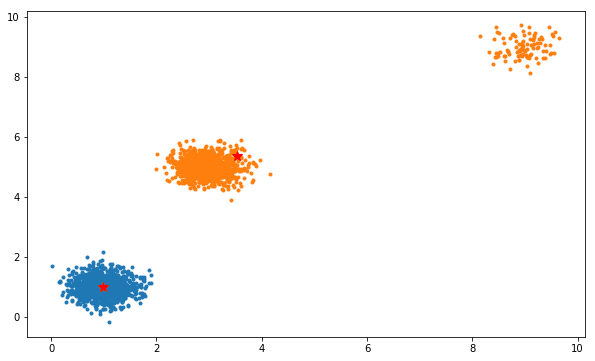

iter : 24
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


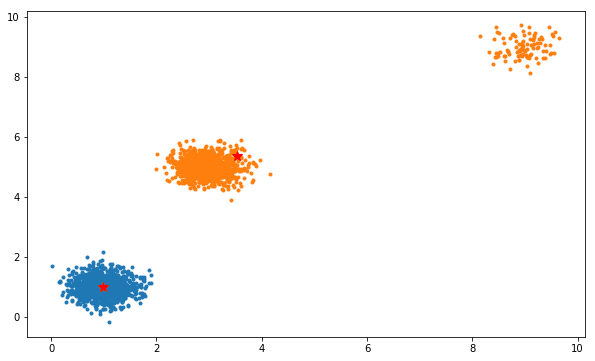

iter : 25
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


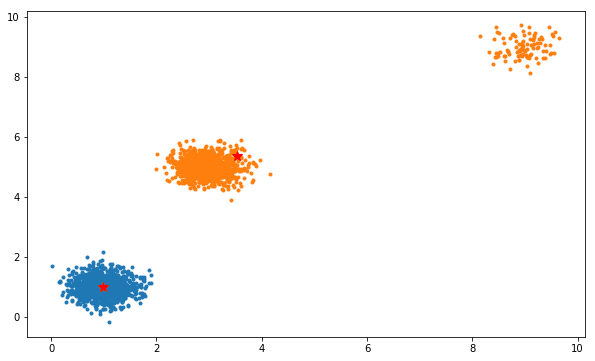

iter : 26
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


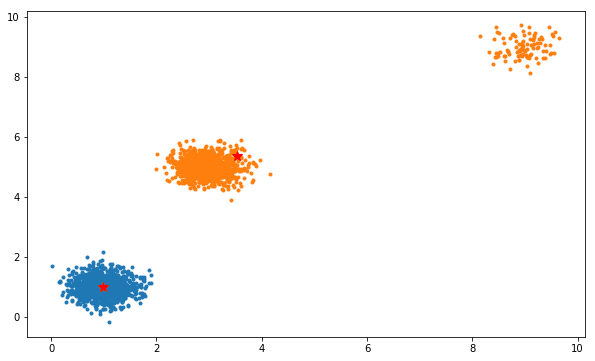

iter : 27
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


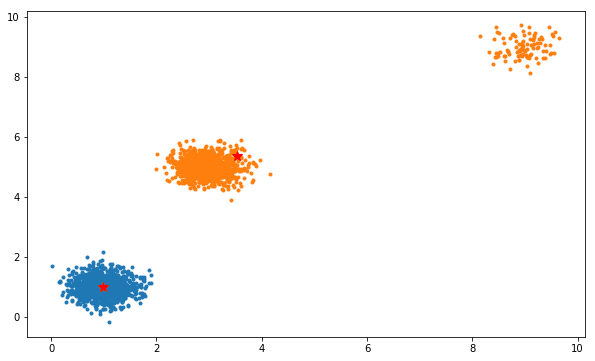

iter : 28
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


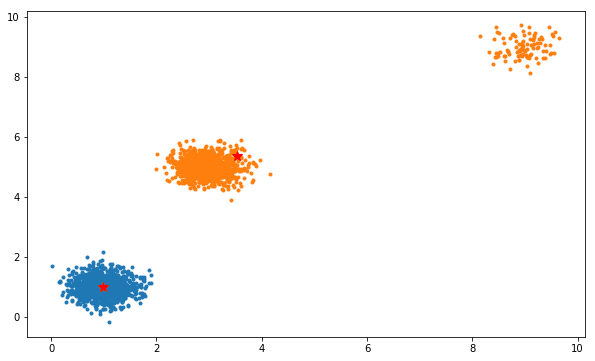

iter : 29
Avg of dist : 2.9656544520955164
mu[0] : [0.98994561 0.99473683]
mu[1] : [3.52755897 5.36029313]


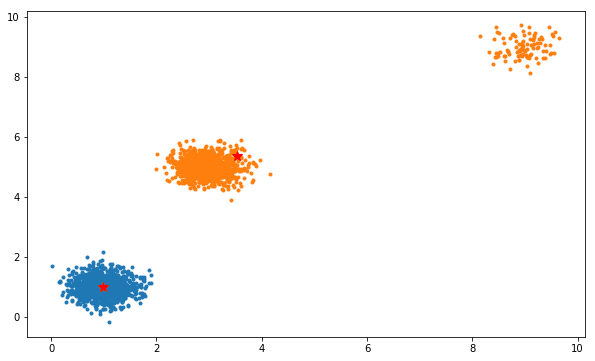

In [53]:
k = 2
kmu, kc = k_means(X, k, n_iter=30, verbose=True)